1.1. Теоретический материал – Линейные регрессионные модели

Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть 𝑓(𝑥) = 𝑏 +𝑚⋅𝑥+,где𝑚–наклонлинии,а𝑏–егосдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением 𝑦(х) и его фактическим значением.
Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

1.1.1 Пример

In [1]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1 ]] и p = [[m], [c]]
#Построим A по x :

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
#Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999997


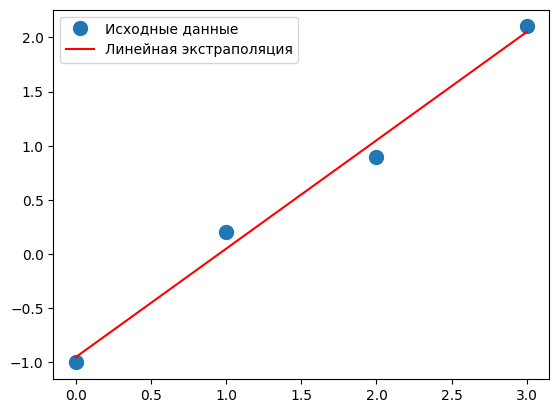

In [3]:
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример

In [4]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записывание данных в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [5]:
#читаем данные из файлов 
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

[-4.59772603 -3.71531796 -2.74591648 -1.87392073 -1.39883981 -0.3569643
  0.54232702  2.16590848  2.98952764  4.11602354  5.20232861]
[24.80973464 16.02647474  8.94894146  4.11992699  0.97081216  0.18032326
  1.11581956  3.72655743  9.36189799 15.95950234 24.83176279]


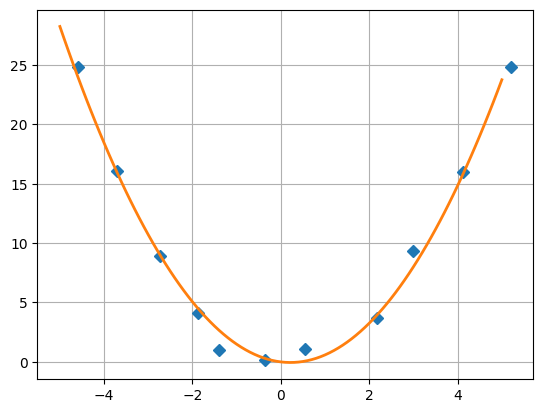

In [8]:
# нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов 
# задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример

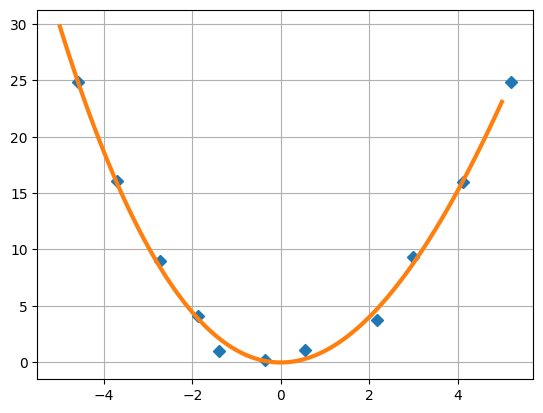

In [9]:
#решение
# нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

Задание:

In [41]:
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-10,10,10)
y = x**2+delta*(rand(10)-0.5)
x += delta*(rand(10)-0.5)
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')
print(x)
print(y)

[-10.19322032  -7.58055922  -5.3618394   -3.28212591  -1.00036729
   1.20500266   3.12075709   5.46276617   7.66259325  10.27833764]
[ 99.54994288  60.36385609  30.83156978  11.22940027   0.8771563
   1.35887307  11.27711807  30.80307261  60.73551867 100.46071216]


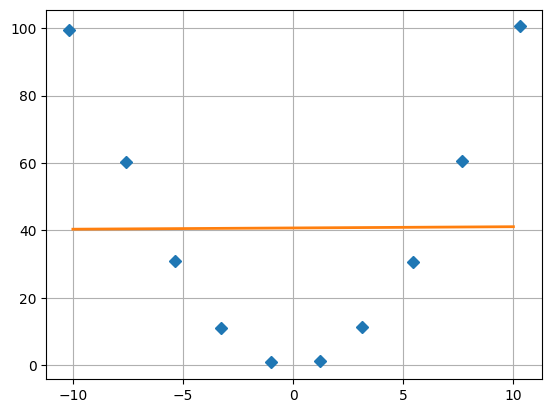

In [43]:
#Полином первой степени
m = vstack((x, ones(10))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-10, 10, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec + s[1], '-', lw = 2)
plt.grid()
plt.savefig('полином 1-й степени.png')

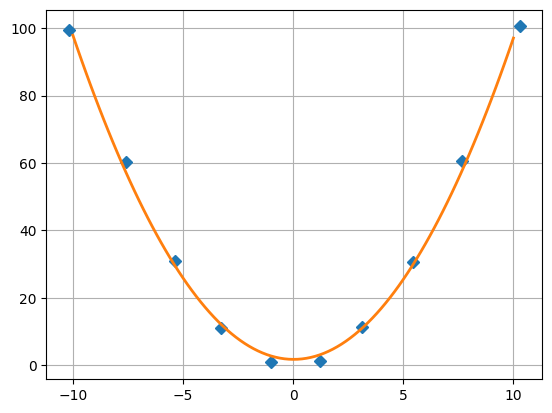

In [45]:
#Полином второй степени
m = vstack((x**2, x, ones(10))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.savefig('полином 2-й степени.png')

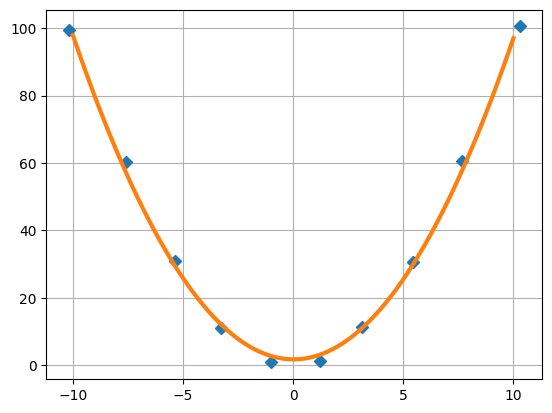

In [46]:
#Полином третьей степени
m = vstack((x**3, x**2, x, ones(10))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-10, 10, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

1.1.4 Пример

In [10]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
print(xdata, ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] [0.96577718 0.96797596 1.06311628 0.96956352 1.01439107 0.92361284
 0.81012153 0.82131536 0.61610151 0.77911582 0.7226669  0.67479757
 0.62334579 0.5547539  0.58505303 0.42578646 0.50352568 0.43317585
 0.27427677 0.36688771 0.33248058 0.26185096 0.27702154 0.29440202
 0.21710045 0.34664645 0.31633924 0.26164651 0.21447475 0.2118202
 0.24752966 0.17447207 0.29654813 0.26219702 0.28348263 0.26712899
 0.24011076 0.26594101 0.31731679 0.213

In [11]:
# используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit as sp
beta_opt, beta_cov = sp(f, xdata, ydata)
beta_opt

array([0.26144027, 0.74654451, 0.54599762])

In [12]:
# вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0002631397957123317
0.1315315800182852


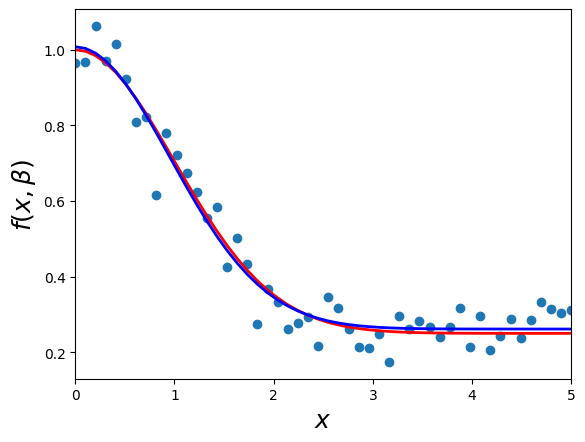

In [13]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

1.1.5 Пример

In [14]:
# решение
#1
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev =sum(beta_cov[0])
print(lin_dev)


#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.23948455 0.75216307]
0.0001685383176718594
0.14819748986111567


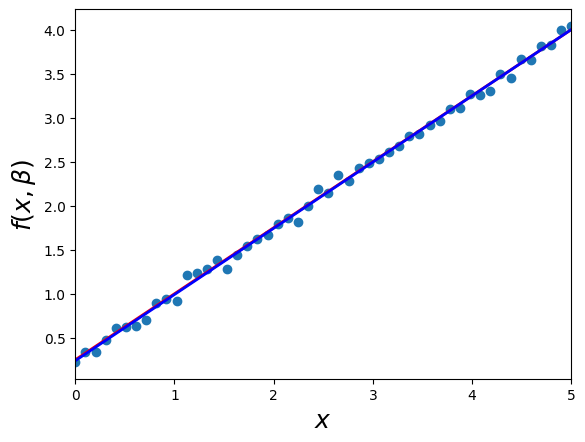

In [15]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [16]:
# решение
#2
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev =sum(beta_cov[0])
print(lin_dev)


#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.24742343 0.75701884 0.49903134]
0.000174862358283699
0.14581690101498174


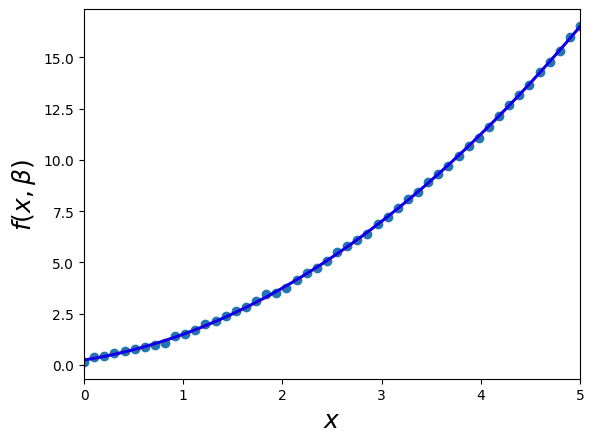

In [17]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [18]:
# решение
#3
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev =sum(beta_cov[0])
print(lin_dev)


#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.98821837 2.00611206]
6.090652313866943e-05
0.14084276343425753


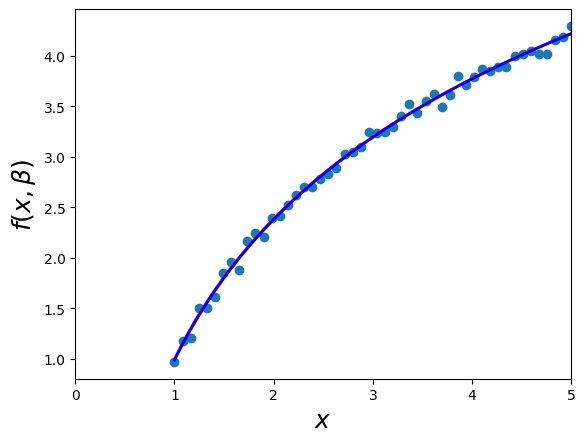

In [19]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

In [20]:
# решение
#4
#добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev =sum(beta_cov[0])
print(lin_dev)


#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.00264222 1.99763555]
5.843952894694597e-06
0.13760708212276973


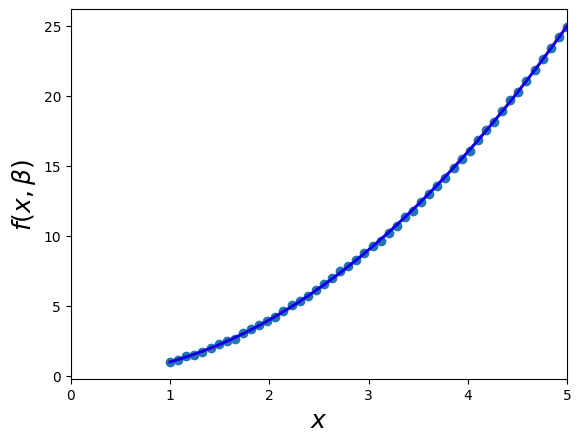

In [21]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

Задание:

[1.50478974 1.70012629]
0.0001706805603930057
0.12391044262351691


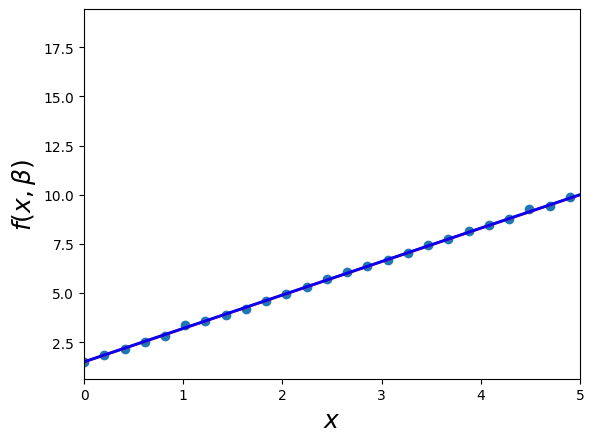

In [49]:
beta = (1.50, 1.70)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
lin_dev =sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.52739287 1.68819265 0.50120751]
0.00035310426264295716
0.15668884168033692


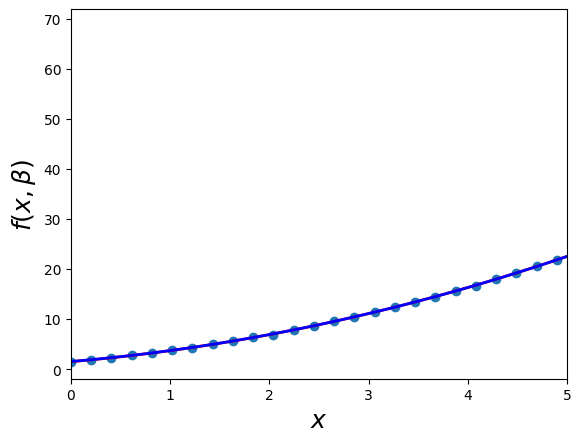

In [51]:
beta = (1.50, 1.70, 0.50)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
xdata = np.linspace(0, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
lin_dev =sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[2.97533007 4.01811106]
0.00018893510786270585
0.1370519209234104


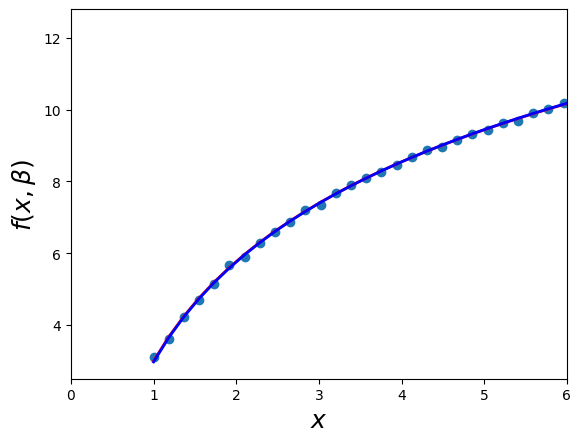

In [52]:
beta = (3, 4)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 10, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
lin_dev =sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 6)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[3.00005267 3.99999217]
1.1535785379922111e-09
0.10861118120265005


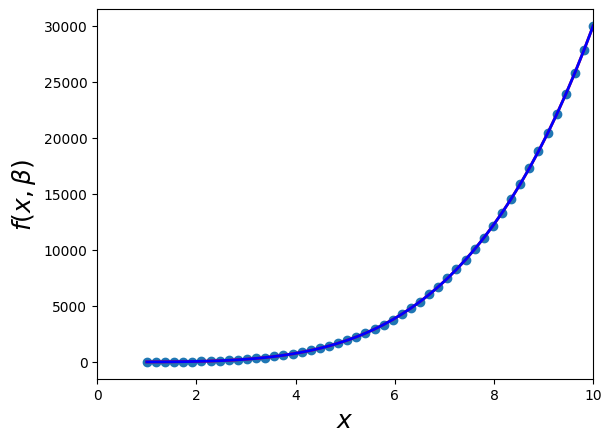

In [53]:
beta = (3, 4)
def f(x, b0, b1):
    return b0 * x ** b1
xdata = np.linspace(1, 10, 50)
y = f(xdata, *beta) 
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp(f, xdata, ydata)
print(beta_opt)
lin_dev =sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

1.2. Теоретический материал – Задачи регрессии

Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

1.2.1 Пример

In [22]:
#Импортируем необходимые библиотеки
#используем pandas и numpy для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                             2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
          'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [24]:
#Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


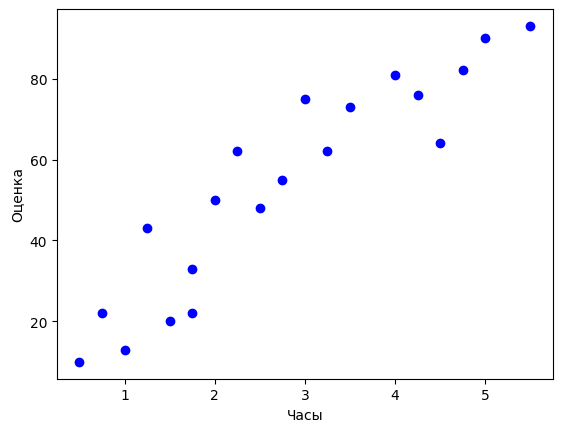

In [25]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = 'данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print (y)
# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print (regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

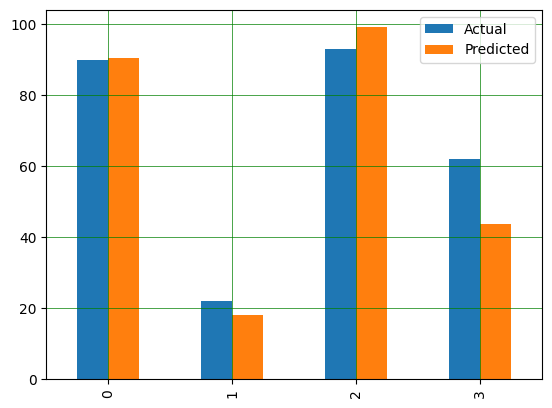

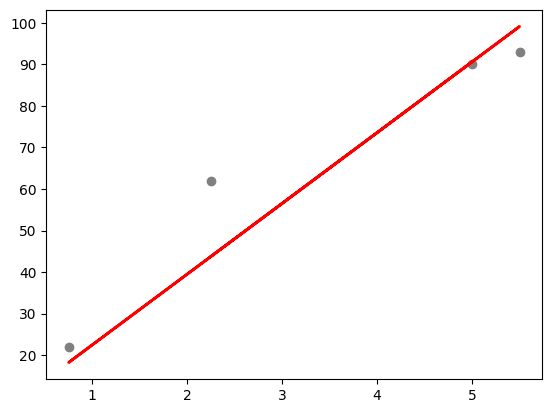

In [27]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
# визуализируем результат сравнения 8 виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
Задание:

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
display(data.head())

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print('Коэффициенты для регрессии')
print(regressor.intercept_)
print (regressor.coef_)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
Коэффициенты для регрессии
26780.09915062818
[9312.57512673]


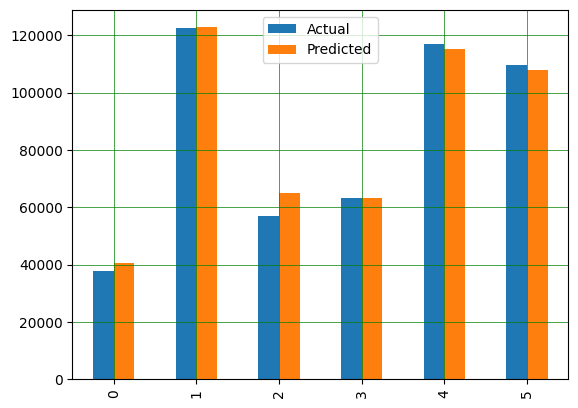

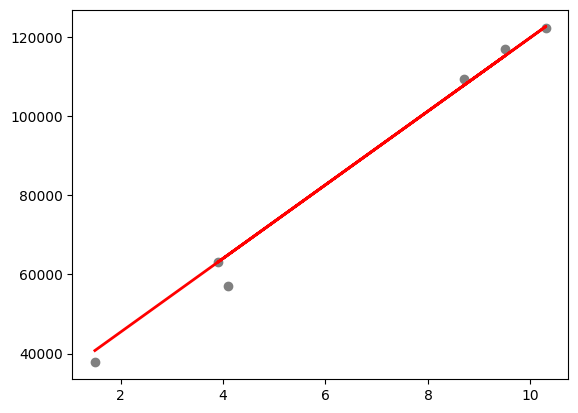

In [55]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

1.3. Теоретический материал – Множественная регрессия

В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

1.3.1 Пример

In [28]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose (X) # transpose so input vectors
X = np.c_[X, np.ones(X. shape [0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Пример

In [33]:
#Импортируем необходимые библиотеки
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
# формируєм DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame (new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame (new_X)
df1 = df1.rename (columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head ()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [34]:
# изучим данные
print (dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [35]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [36]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12345)

In [37]:
#для обучения алгоритма мы выполняем тот же код, .что и рамьше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.086155
x2,0.497695
x3,-0.164738


In [39]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
10,4,3.812853
19,3,2.571273
8,5,3.334391
17,0,5.141810
3,4,1.979241


In [40]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 6.702953181411002


Задание

In [56]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
display(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12345)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

                      Coefficient
fixed acidity            0.028087
volatile acidity        -0.960868
citric acid             -0.250245
residual sugar           0.024417
chlorides               -1.756461
free sulfur dioxide      0.005000
total sulfur dioxide    -0.003283
density                -23.921985
pH                      -0.547421
sulphates                0.962794
alcohol                  0.289807
      Actual  Predicted
1363       4   4.933404
1094       6   5.467366
317        6   5.422389
772        5   4.954591
997        7   6.069670
...      ...        ...
1169       6   6.008816
462        5   6.340664
1119       5   6.234786
1487       5   5.710100
453        7   6.102275

[320 rows x 2 columns]
Mean Squared Error: 0.4712739814545035


Задание*

In [62]:
#Вариант 6
import numpy as np
x=[4.0,4.2,4.4,4.6,4.8,5.0]
y=[4.0,3.0,6.0,6.0,4.0,4.0]
new_y=np.array(y)
new_x=np.array(x)
A=np.vstack([new_x,np.ones(len(new_x))]).T
A

array([[4. , 1. ],
       [4.2, 1. ],
       [4.4, 1. ],
       [4.6, 1. ],
       [4.8, 1. ],
       [5. , 1. ]])

In [63]:
m,c= np.linalg.lstsq(A,new_y,rcond=None)[0]
print(m,c)

0.42857142857142766 2.571428571428573


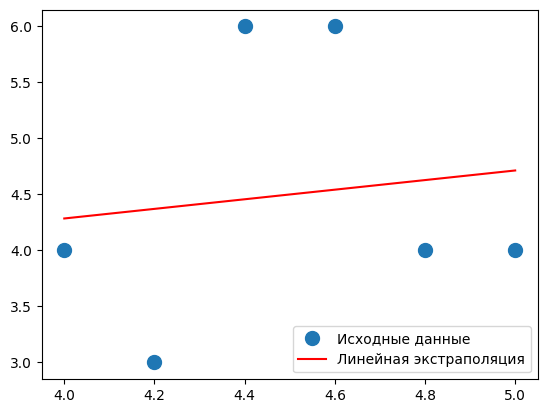

In [64]:
import matplotlib.pyplot as plt
plt.plot(new_x,new_y,'o', label='Исходные данные', markersize=10)
plt.plot(new_x,m*new_x+c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()

[4.  4.2 4.4 4.6 4.8 5. ]
[4. 3. 6. 6. 4. 4.]
-0.0023516 0.19277 -0.68789


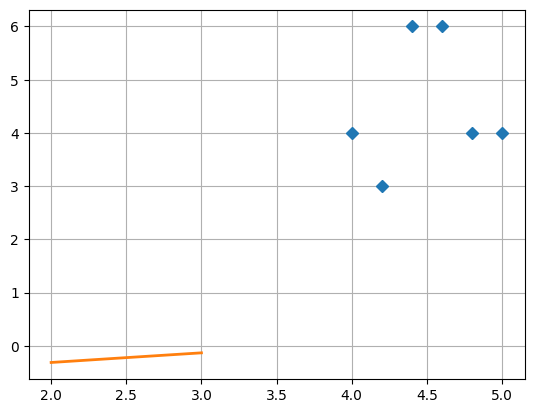

In [65]:
from numpy import *
from numpy.random import *
print(new_x)
print(new_y)
m=vstack((new_x**2,new_x,ones(6))).T
s=np.linalg.lstsq(m,new_y,rcond=None)[0]
s=[-0.0023516,0.19277,-0.68789]
x_prec=linspace(2,3,11)
plt.plot(new_x,new_y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
print(s[0],s[1],s[2])